In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [372]:
df= pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Our target is Happiness Score it has continous value so Its a Regression Problem.

In [373]:
df.shape

(158, 12)

We have 158 rows and 12 columns in dataset.

# Data Preprocessing

# Visualization

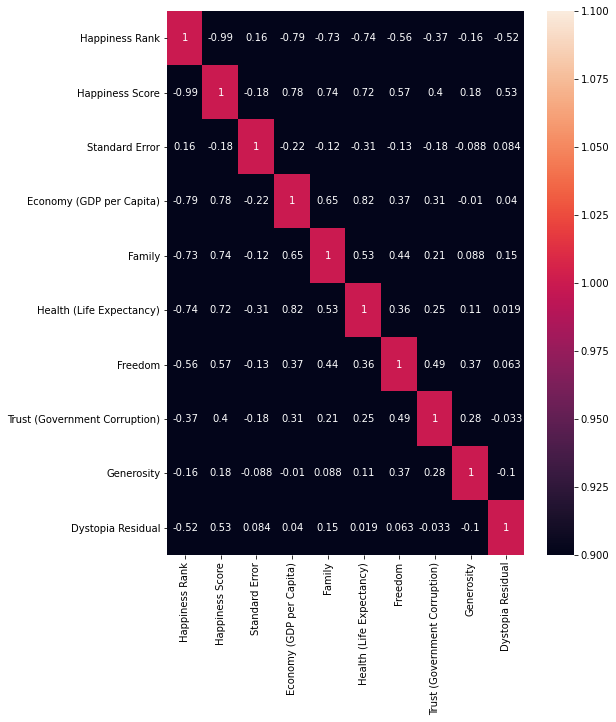

In [374]:
plt.figure(figsize=(8,10))
sns.heatmap(df.corr(), annot=True, vmin=1.0, vmax=1.0)
plt.show()

In [428]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


High Std present in Happiness Rank, Economy (GDP per Capita),And Dystopia Residual variables means data is spread too much.

In [375]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [376]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We have float type,object and int value in all independent variables and Happiness Score is our target variable its class is float.

In [377]:
data=df.drop(['Happiness Rank','Country','Region'],axis=1)

In [378]:
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [379]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no missing values.

In [385]:
data.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There is skewness present in standard error,family , trust, Generosity. we will remove.

In [386]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))

In [387]:
data.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Happiness Rank                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Happiness Score                  AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Standard Error                   AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Family                           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Health (Life Expectancy)         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Freedom                          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.0945122x0.343182)
Generosity                          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Dystopia Residual                   AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

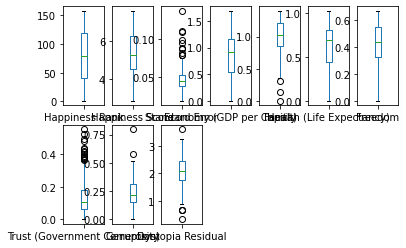

In [388]:
df.plot(kind='box',subplots=True,layout=(2,7))

Outliers present in the dataset.lets remove it.

In [390]:
df_new=df[(z<3).all(axis=1)]

In [391]:
df.shape

(158, 12)

In [392]:
df_new.shape

(149, 12)

After removing outliers.

In [393]:
df=df_new
df.shape

(149, 12)

In [429]:
#Percentage loss of data:
Data_loss=((158-149)/158)*100
Data_loss

5.69620253164557

data_loss is less than 10% means we can proceed it.

In [394]:
y = data['Happiness Score']
x = data.drop(['Happiness Score'],axis=1)

x is our input or feature data and y is output or target data.

# Scalling the data using Min-Max Scaler:

In [430]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

from sklearn.linear_model import LinearRegression
lm=LinearRegression()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [431]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [396]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [399]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=.33,random_state=12)

In [400]:
x_train.shape

(52, 8)

In [401]:
y_train.shape

(52,)

In [402]:
x_test.shape

(106, 8)

In [403]:
y_test.shape

(106,)

# Training

In [404]:
lm= LinearRegression()

In [405]:
lm.fit(x_train,y_train)

LinearRegression()

In [406]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [407]:
pred_test=lm.predict(x_test)

In [408]:
print(r2_score(y_test,pred_test))

0.99999993003679


We got good r2 score.

# Regularization

In [409]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [410]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls= Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [411]:
ls= Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls =ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9999970365263979

In [413]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999351252083043

# Ensemble Technique

In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [420]:
rf=RandomForestRegressor(criterion= 'mae', max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs= r2_score(y_test,pred_decision)
print('R2_score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2_score: 79.2866238887608
Cross Val Score: -381.41135881020034


In [421]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor

import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [424]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

# Conclusion

In [433]:
loaded_model = pickle.load(open('model_pickle','rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.99999993003679


In [435]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
Predicted,5.101537,4.512247,5.986868,3.930847,6.484956,6.797532,3.46482,3.896492,5.097494,4.677257,...,5.832548,5.847543,5.128856,5.790492,5.812395,3.680857,6.574856,7.526843,5.604521,4.738491
Original,5.587740,4.278290,6.073720,4.504020,6.528600,6.511020,4.78591,4.858830,5.451810,4.533780,...,5.958180,5.996130,4.613195,5.895400,5.687840,4.063330,6.598820,7.249620,5.064440,5.010180
